<a href="https://colab.research.google.com/github/ringolove/Economics_with_Python/blob/main/economics_with_python_%EA%B2%BD%EC%A0%9C%ED%95%99%EB%B6%80_%EA%B9%80%EB%8F%99%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

경제학부 2014048786 김동현

* 코드 리뷰 및 도움 주신 분
 * 이숙번(에누마 코리아 백엔드 엔지니어, 디플러스 강사) https://kr.linkedin.com/in/%EC%88%99%EB%B2%88-%EC%9D%B4-19545a94
* 참고 사이트 및 도서
 * 한국은행 경제통계시스템 https://ecos.bok.or.kr/
 * 데이터 사이언스 스쿨 https://datascienceschool.net/
 * 오픈튜토리얼스 https://www.opentutorials.org/
 * 대구 AI 허브 https://www.aifor.kr/
 * Principles of Economics, 9th Edition, N. Mankiw, 2021

* 이 코드는 깃허브에서도 확인하실 수 있습니다.
 * https://github.com/ringolove/Economics_with_Python

#1.

* 중심극한정리 시뮬레이션



In [136]:
# 중심극한정리(Central Limit Theorem)
# : 동일분포를 가지는 분포들의 평균은 그 개수가 많아지면 언제나 정규분포로 수렴한다.

import scipy as sp
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt

print('평균과 표준편차를 입력해주십시오.')
mean = float(input('평균: '))
s_dev = float(input('표준편차: '))
print('\n'+'입력받은 평균과 표준편차를 바탕으로 n개의 확률변수 값을 구합니다.')
n = int(input('n : '))
random_variable = [np.random.normal(loc=mean, scale=s_dev, size=n)] # 입력받은 평균과 분산 내의 임의 확률변수 n개 1추출
random_variable

평균과 표준편차를 입력해주십시오.
평균: 0.5
표준편차: 0.3

입력받은 평균과 표준편차를 바탕으로 n개의 확률변수 값을 구합니다.
n : 10


[array([0.11010003, 0.50519266, 0.81139357, 0.43008124, 0.64404398,
        0.67841672, 0.68520049, 0.84336519, 0.32742773, 0.4231736 ])]

입력하신 크기에 따라 랜덤 샘플링을 실행하고 그 분포를 표시합니다.
(권장 크기: 1,000~1,000,000)
샘플 크기: 10000


Text(0.5, 1.0, 'sample size = 10000')

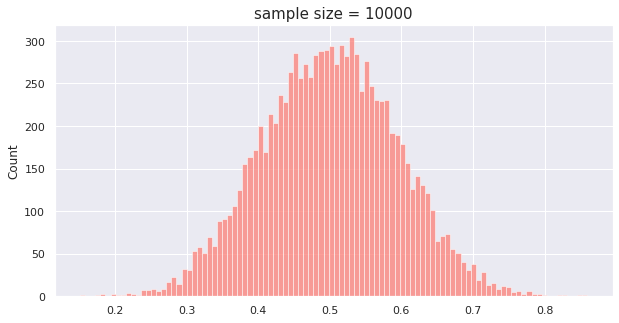

In [137]:
print('입력하신 크기에 따라 랜덤 샘플링을 실행하고 그 분포를 표시합니다.'+'\n'
     +'(권장 크기: 1,000~1,000,000)')
sample = int(input('샘플 크기: '))
rv_mlist = [np.mean(np.random.normal(loc=mean, scale=s_dev, size=n)) for i in range(sample)] # 입력받은 샘플 크기만큼 확률변수를 샘플링하고 그 평균을 리스트로 저장
sns.set(color_codes=True)
bar = plt.subplots(figsize=(10,5))
bar = sns.histplot(rv_mlist, color='#FC7F77', bins=100) # Y축: count
bar.set_title('sample size = {0}'.format(sample), size=15)

최대로 샘플링한 분포의 그래프와 정규분포 그래프를 함께 표시합니다.


Text(0.5, 1.0, 'Central Limit Theorem')

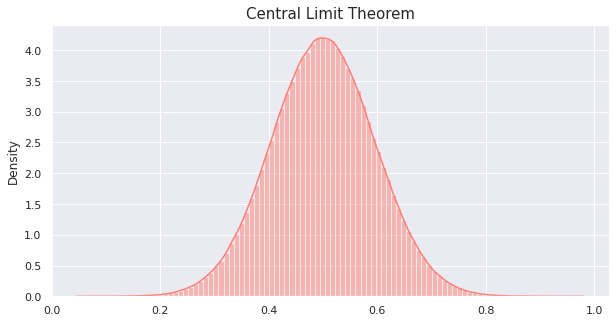

In [138]:
print('최대로 샘플링한 분포의 그래프와 정규분포 그래프를 함께 표시합니다.')
rv_mlist = [np.mean(np.random.normal(loc=mean, scale=s_dev, size=n)) for i in range(int(1e6))] # 1e6 = 1,000,000(최댓값)/1e6 이상의 값은 오류가 발생하므로 주의
sns.set(color_codes=True)
bar = plt.subplots(figsize=(10,5))
bar = sns.histplot(rv_mlist, color='#FC7F77', bins=100, kde=True, stat="density")
bar.set_title('Central Limit Theorem', size=15)

#2.

* 머신러닝을 활용한 GDP 예측

In [143]:
import tensorflow as tf
import pandas as pd
import scipy as sp
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt

# 데이터 준비
# 출처: 한국은행 경제통계시스템 - 복수통계검색 - 10.3.1.1. 국내총생산과 지출(명목, 연간) - csv 파일로 저장 후 전처리
# csv 파일: Comma Seperated Value, ',' 쉼표(comma)로 분리된 텍스트 파일
train = pd.read_csv("./train.csv", index_col=0, parse_dates=True) # 1970~2010년 동안의 경제지표 및 국내총생산 데이터
test = pd.read_csv("./test.csv", index_col=0, parse_dates=True) # 2011~2020년 동안의 경제지표 및 국내총생산 데이터

In [144]:
# 전체 단위: 조원
# C - 민간최종소비지출
# I - 총고정자본형성
# G - 정부최종소비지출
# EX, IM - 재화와서비스의수출, (공제)재화와서비스의수입
# GDP - 국민총소득

# train에 담긴 데이터 중 상위 5개 행 출력
train.head()

,C,I,G,EX,IM,GDP
year,,,,,,
1970-01-01,2.1,0.7,0.3,0.3,0.6,2.8
1971-01-01,2.6,0.8,0.4,0.4,0.8,3.5
1972-01-01,3.1,0.9,0.4,0.7,0.9,4.3
1973-01-01,3.8,1.3,0.5,1.3,1.5,5.5
1974-01-01,5.4,2.2,0.8,1.8,2.6,7.9


In [135]:
# 데이터프레임 train의 행렬 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 1970-01-01 to 2010-01-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       41 non-null     float64
 1   I       41 non-null     float64
 2   G       41 non-null     float64
 3   EX      41 non-null     float64
 4   IM      41 non-null     float64
 5   GDP     41 non-null     float64
dtypes: float64(6)
memory usage: 2.2 KB


In [139]:
# 컬럼별 요약 통계량 확인(개수, 평균, 표준편차, 최댓값, 최솟값, 사분위수)
train.describe()

,C,I,G,EX,IM,GDP
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,201.565854,121.607317,47.078049,134.973171,128.604878,380.804878
std,212.451488,124.979143,55.139407,169.546612,160.519217,405.557305
min,2.100000,0.700000,0.300000,0.300000,0.600000,2.800000
25%,24.900000,13.100000,4.700000,11.300000,14.700000,39.400000
50%,100.700000,74.900000,22.000000,50.100000,51.700000,200.400000
75%,355.100000,206.900000,71.000000,221.200000,209.500000,647.300000
max,667.100000,399.800000,187.900000,623.000000,585.900000,1324.600000


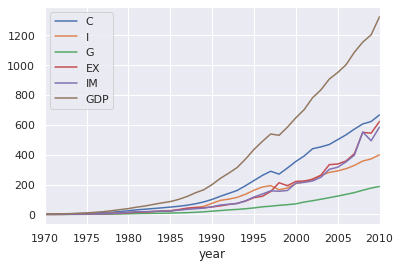

In [140]:
# 데이터를 그래프 평면상에 표시
train.plot()

In [142]:
# 각 경제지표를 독립변수, 종속변수로 나누기
x_gdp = train.drop(['GDP'], axis=1) # C, I, G, EX, IM - 독립변수
y_gdp = train[['GDP']] # GDP - 종속변수
print(x_gdp.shape, y_gdp.shape) # 각각 41행 5열, 41행 1열로 저장된 독립변수와 종속변수
x_gdp.head()

(41, 5) (41, 1)


,C,I,G,EX,IM
year,,,,,
1970-01-01,2.1,0.7,0.3,0.3,0.6
1971-01-01,2.6,0.8,0.4,0.4,0.8
1972-01-01,3.1,0.9,0.4,0.7,0.9
1973-01-01,3.8,1.3,0.5,1.3,1.5
1974-01-01,5.4,2.2,0.8,1.8,2.6


In [146]:
# 모델 생성
# 복잡한 구조의 모델을 자유롭게 구성하기 위해 Funtional 방식으로 모델 설계
# input과 output 사이에 히든레이어를 추가해 신경망을 더 깊게 만들어 정확한 결과값을 예측

X = tf.keras.layers.Input(shape=[5]) # 독립변수 41행 '5열' -> 입력값 5개
H = tf.keras.layers.Dense(10, activation='swish')(X) # 5개의 입력을 받고 10개의 출력을 만들어 output으로 전달
H = tf.keras.layers.Dense(10, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.Model(X, Y)
model.compile(loss='mse') # loss: 모델이 얼마나 정답에 가까이 맞추고 있는지 평가하는 지표
# mse: mean squred error, 에러의 제곱을 평균한 것

model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_35 (Dense)            (None, 10)                60        
                                                                 
 dense_36 (Dense)            (None, 10)                110       
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [147]:
# Early Stopping: loss값이 줄어들지 않는 오버피팅이 발생하면 멈추고 멈추기 전 최적의 모델을 적용
early = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta = 0, # 개선되고 있다고 판단하기 위한 최소 변화량
    patience = 5, # 개선이 없는 상태를 얼마나 기다릴지 표기
    restore_best_weights = True # 멈추기 전 최적의 결과값을 복구
)

In [164]:
# 모델에 데이터 학습
# 약 3천번 기준 loss값 47.2844까지 도달
model.fit(x_gdp, y_gdp, epochs=30, callbacks=[early])

Epoch 1/30
2/2 [==============================] - 0s 6ms/step - loss: 50.4375
Epoch 2/30
2/2 [==============================] - 0s 6ms/step - loss: 47.1783
Epoch 3/30
2/2 [==============================] - 0s 5ms/step - loss: 46.9639
Epoch 4/30
2/2 [==============================] - 0s 6ms/step - loss: 47.3588
Epoch 5/30
2/2 [==============================] - 0s 5ms/step - loss: 47.3441
Epoch 6/30
2/2 [==============================] - 0s 5ms/step - loss: 48.5253
Epoch 7/30
2/2 [==============================] - 0s 5ms/step - loss: 96.0144
Epoch 8/30
2/2 [==============================] - 0s 7ms/step - loss: 47.2844


In [169]:
# 모델 비교 및 분석
# 예측을 위해 train, test 데이터의 독립변수, 종속변수를 각각 분리해 저장
x_train, y_train = train[['C', 'I', 'G', 'EX', 'IM']], train[['GDP']]
x_test, y_test = test[['C', 'I', 'G', 'EX', 'IM']], test[['GDP']]

# pred1 = train 데이터(1970~2010의 경제지표)를 입력해 위에서 만든 모델로 GDP 예측
# pred1 = test 데이터(2011~2020의 경제지표)를 입력해 위에서 만든 모델로 GDP 예측
pred1 = model.predict(x_train)
pred2 = model.predict(x_test)

In [168]:
# train 데이터로 예측한 GDP와 실제 GDP를 나란히 배치하여 비교
df1 = pd.DataFrame({'train_pred': pred1.reshape(-1), 'train_real': y_train.iloc[:,0]})
df1.head(10)

,train_pred,train_real
year,,
1970-01-01,2.868883,2.8
1971-01-01,3.518034,3.5
1972-01-01,4.235599,4.3
1973-01-01,5.706863,5.5
1974-01-01,8.663687,7.9
1975-01-01,11.667825,10.5
1976-01-01,15.141323,14.4
1977-01-01,19.418701,18.6
1978-01-01,26.652176,25.2


In [170]:
# test 데이터로 예측한 GDP와 실제 GDP를 나란히 배치하여 비교
# df1과 df2의 차이: test 데이터는 모델 구조를 만들때 포함되지 않았기 때문에
# 완성된 모델에게는 입력된 적 없는 새로운 데이터로 인식됨
df2 = pd.DataFrame({'test_pred': pred2.reshape(-1), 'test_real': y_test.iloc[:,0]})
df2

,test_pred,test_real
year,,
2011-01-01,1402.435059,1397.5
2012-01-01,1441.846802,1455.2
2013-01-01,1464.162964,1510.4
2014-01-01,1499.183105,1570.5
2015-01-01,1561.199585,1663.2
2016-01-01,1635.736938,1747.1
2017-01-01,1759.828369,1843.2
2018-01-01,1810.199219,1905.8
2019-01-01,1843.227295,1941.1
